All Input Variables: 
['air' 'art' 'government' 'health']
---------------------
Number of Unique Addresses in input variable: 
270
Number of Unique Addresses in other variables: 
282
---------------------
Number of Unique Length of Evidence traces for input variable: 
2
Number of Unique Length of Evidence traces for for other variables: 
6
---------------------
----------------------------(Method-1) Kologromov 2 sample test for addresses------------------------
the two probability distributions are similar.


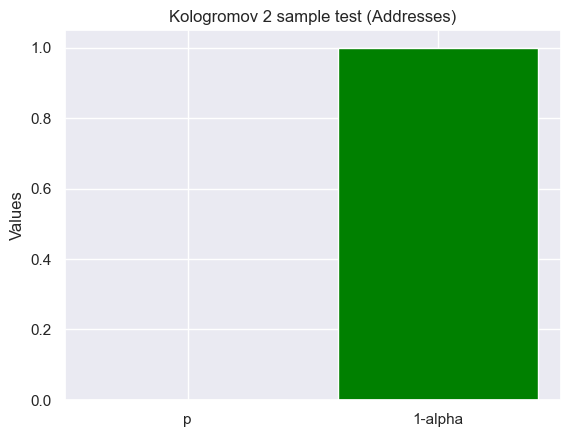

----------------------------(Method-1) Kologromov 2 sample for positions------------------------
the two probability distributions are similar.


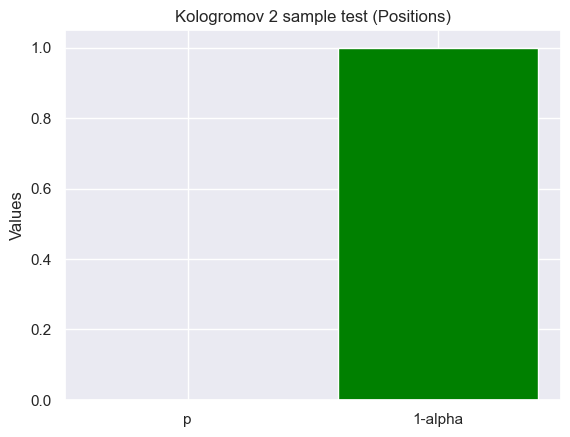

-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
----------------------------(Method-2) Kuiper test for addresses------------------------
Kuiper statistic for addresses: 
1.074433656957929
the two probability distributions are different.


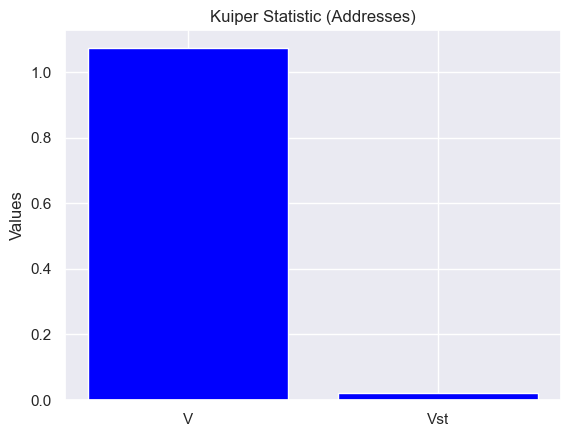

----------------------------(Method-2) Kuiper test for positions------------------------
Kuiper statistic for addresses: 
0.5
the two probability distributions are different.


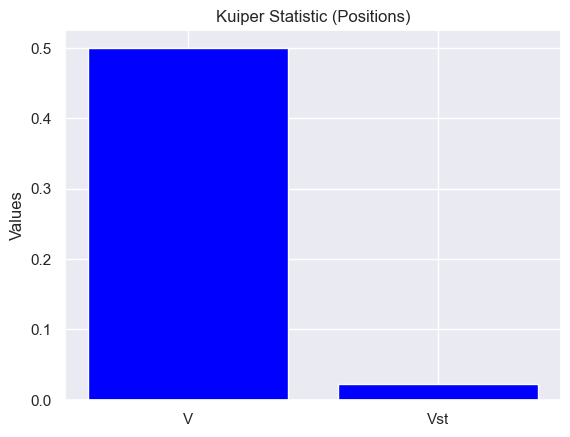

-------------------------------------------------------------------------------
-----------------------------------------------------------------------------
----------------------------(Method-3)Jensor-Shannon divergence for addresses------------------------
Jensor-Shannon divergence: 
0.03861736889251362
the two probability distributions are different.


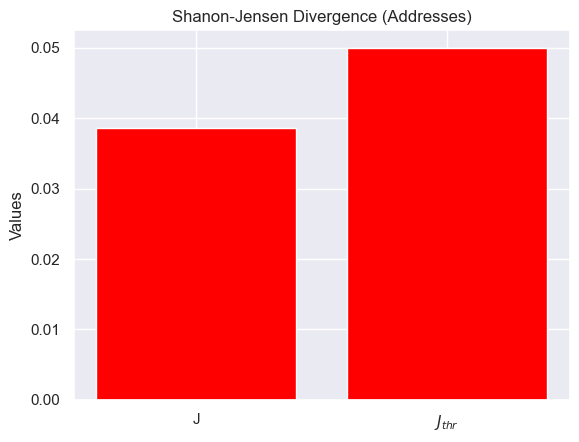

----------------------------(Method-3)Jensor-Shannon divergence for positions------------------------
Jensor-Shannon divergence: 
0.6931471805599453
the two probability distributions are similar.


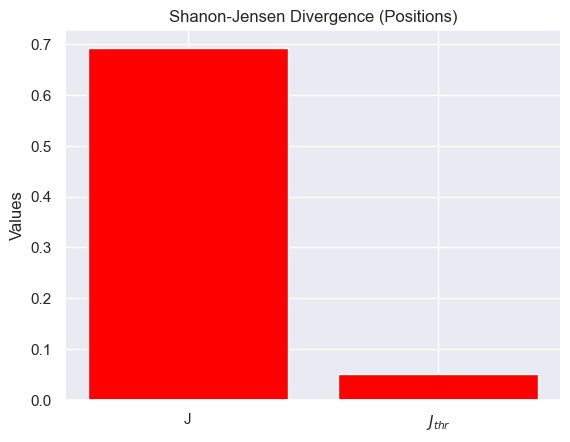

-----------------------------------------------------------------------------
-----------------------------------------------------------------------------


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from scipy.stats import chi2
from scipy.optimize import root
from scipy.stats import entropy

sns.set_theme()

#get list of all file names in directory "data"
file_names = os.listdir(r"D:\Research_work\Trace_Analysis\data5")

#get the part of names in file_names before '-'
input_variables = [name.split('-')[0] for name in file_names]

#find unique elements in input_variables
unique_input_variables = np.unique(input_variables)
print("All Input Variables: ")
print(unique_input_variables)
print("---------------------")


index_variable=0 # which variable (out of unique_input_variables) do I take as the fixed (or secret)


addresses_sec = []
addresses_nosec = []

position_sec = []
position_nosec = []

n_sec=0
n_nosec=0

for names in file_names:

    input_variable=names.split('-')[0] 


    if input_variable == unique_input_variables[index_variable]:
        df = pd.read_csv("D:/Research_work/Trace_Analysis/data5/"+ names, sep=',', header=None)
        df.columns = ['ignore', 'command (read/write)', 'physical address', 'size','gem5 flags', 'timestamp','program_counter']


        #find unique elements in column 'command (read/write)'
        unique_commands=df['command (read/write)'].unique()

        #create dictionary of unique_commands that integer encode the column 'command (read/write)'
        dict_commands = {unique_commands[i]:i for i in range(len(unique_commands))}


        #integer encode 'comand (read/write)' column
        df['command (read/write)'] = df['command (read/write)'].map(dict_commands)
        
        #get 'physical address' column as a numpy array
        physical_address = df['physical address'].to_numpy()

        addresses_sec.append(physical_address)
        position_sec.append(len(physical_address))
        n_sec+=1

    else:
        df = pd.read_csv("D:/Research_work/Trace_Analysis/data5/"+ names, sep=',', header=None)
        df.columns = ['ignore', 'command (read/write)', 'physical address', 'size','gem5 flags', 'timestamp','program_counter']


        #find unique elements in column 'command (read/write)'
        unique_commands=df['command (read/write)'].unique()

        #create dictionary of unique_commands that integer encode the column 'command (read/write)'
        dict_commands = {unique_commands[i]:i for i in range(len(unique_commands))}


        #integer encode 'comand (read/write)' column
        df['command (read/write)'] = df['command (read/write)'].map(dict_commands)
        
        #get 'physical address' column as a numpy array
        physical_address = df['physical address'].to_numpy()

        addresses_nosec.append(physical_address)
        position_nosec.append(len(physical_address))
        n_nosec+=1


#concatenate addresses
conc_addresses_sec = np.concatenate(addresses_sec, axis=0)
conc_addresses_nosec = np.concatenate(addresses_nosec, axis=0)
conc_address_tot = np.concatenate([conc_addresses_sec,conc_addresses_nosec], axis=0)

#concatenate positions
conc_positions_tot = np.concatenate([position_sec,position_nosec], axis=0)

#find unique elements in Addresses
unique_addresses_sec = np.unique(conc_addresses_sec)
print("Number of Unique Addresses in input variable: ")
print(len(unique_addresses_sec))

unique_addresses_nosec = np.unique(conc_addresses_nosec)
print("Number of Unique Addresses in other variables: ")
print(len(unique_addresses_nosec))
print("---------------------")

#find unique elements in Positions
unique_positions_sec = np.unique(position_sec)
print("Number of Unique Length of Evidence traces for input variable: ")
print(len(unique_positions_sec))

unique_positions_nosec = np.unique(position_nosec)
print("Number of Unique Length of Evidence traces for for other variables: ")
print(len(unique_positions_nosec))
print("---------------------")


#histogram of addresses
unique_a_sec, counts_a_sec = np.unique(conc_addresses_sec, return_counts=True)
unique_a_nosec, counts_a_nosec = np.unique(conc_addresses_nosec, return_counts=True)
unique_a_tot = np.unique(np.concatenate([unique_a_sec,unique_a_nosec], axis=0))
hist_a_sec=np.zeros(len(unique_a_tot))
hist_a_nosec=np.zeros(len(unique_a_tot))
for i in range(len(unique_a_tot)):
    if unique_a_tot[i] in unique_a_sec:
        hist_a_sec[i]=counts_a_sec[np.where(unique_a_sec==unique_a_tot[i])]


    if unique_a_tot[i] in unique_a_nosec:
        hist_a_nosec[i]=counts_a_nosec[np.where(unique_a_nosec==unique_a_tot[i])]

#histogram of positions
unique_p_sec, counts_p_sec = np.unique(position_sec, return_counts=True)
unique_p_nosec, counts_p_nosec = np.unique(position_nosec, return_counts=True)
unique_p_tot = np.unique(np.concatenate([unique_p_sec,unique_p_nosec], axis=0))
hist_p_sec=np.zeros(len(unique_p_tot))
hist_p_nosec=np.zeros(len(unique_p_tot))
for i in range(len(unique_p_tot)):
    if unique_p_tot[i] in unique_p_sec:
        hist_p_sec[i]=counts_p_sec[np.where(unique_p_sec==unique_p_tot[i])]


    if unique_p_tot[i] in unique_p_nosec:
        hist_p_nosec[i]=counts_p_nosec[np.where(unique_p_nosec==unique_p_tot[i])]




#normalize histogram
H_a_sec = np.array(hist_a_sec)/sum(hist_a_sec)
H_a_nosec = np.array(hist_a_nosec)/sum(hist_a_nosec)
H_p_sec=np.array(hist_p_sec)/sum(hist_p_sec)
H_p_nosec=np.array(hist_p_nosec)/sum(hist_p_nosec)


#calculate Kuiper statistic to measure how close two probability distributions are
def kuiper_statistic(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    n = n1 + n2
    data = np.concatenate([data1, data2])
    data.sort()
    cdf1 = np.searchsorted(data1, data, side='right') / n1
    cdf2 = (np.searchsorted(data2, data, side='right') + n1) / n
    d = np.max(cdf1 - cdf2) + np.max(cdf2 - cdf1)
    return d

alpha=0.0001

def kuiper_test(d1,p1, d2,p2,name,times=10000,alpha=0.05):

    data1=[]
    data2=[]
    for i in range(times):
        random_value = np.random.choice(d1, p=p1)
        data1.append(random_value)

        random_value = np.random.choice(d2, p=p2)
        data2.append(random_value)

    data1 = np.array(data1)
    data2 = np.array(data2)
    test=stats.ks_2samp(data1, data2)
    p_value=test[1]
    if p_value > 1- alpha:
        print("the two probability distributions are different.")
    else:
        print("the two probability distributions are similar.")


        # data for the bar plot
    data = [p_value,1-alpha]
    # create the plot
    plt.bar(range(len(data)), data, color='green', align='center')

    # add labels and grid
    plt.ylabel("Values")
    plt.title("Kologromov 2 sample test ("+name+")")
    plt.grid(True)
    # add x-axis tick labels
    plt.xticks(range(len(data)), ["p", "1-alpha"])
    # show the plot
    plt.show()

#In case of addresses
print("----------------------------(Method-1) Kologromov 2 sample test for addresses------------------------")
kuiper_test(unique_a_tot,H_a_sec,unique_a_tot,H_a_nosec,name="Addresses", alpha=alpha)

#In case of positions
print("----------------------------(Method-1) Kologromov 2 sample for positions------------------------")
kuiper_test(unique_p_tot,H_p_sec,unique_p_tot, H_p_nosec,name="Positions", alpha=alpha)
print("-----------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------")


#paper implementation (DATA – Differential Address Trace Analysis: Finding Address-based Side-Channels in Binaries)
C_sec_nosec=((n_sec*n_nosec)/(n_sec+n_nosec))**0.5+0.155+0.24/(n_sec+n_nosec)**0.5
alpha=0.0001

def original_function(x):
    i = np.arange(10)
    return (2*sum(4*i**2*x**2-1*np.exp(-2*i**2*x*2))-(1-alpha))**2

result = root(original_function, 5)
Q_inv=result.x[0]

Vst=Q_inv/C_sec_nosec



def kuiper_test2(data1, data2, name, Vst=Vst):
    V = kuiper_statistic(data1, data2)
    print("Kuiper statistic for addresses: ")
    print(V)

    if V > Vst:
        print("the two probability distributions are different.")
    else:
        print("the two probability distributions are similar.")


    # data for the bar plot
    data = [V,Vst]
    # create the plot
    plt.bar(range(len(data)), data, color='blue', align='center')

    # add labels and grid
    plt.ylabel("Values")
    plt.title("Kuiper Statistic ("+name+")")
    plt.grid(True)
    # add x-axis tick labels
    plt.xticks(range(len(data)), ["V", "Vst"])
    # show the plot
    plt.show()

#In case of addresses
print("----------------------------(Method-2) Kuiper test for addresses------------------------")
kuiper_test2(H_a_sec, H_a_nosec, Vst=Vst,name="Addresses")

#In case of positions
print("----------------------------(Method-2) Kuiper test for positions------------------------")
kuiper_test2(H_p_sec, H_p_nosec, Vst=Vst,name="Positions")
print("-------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------")





#Jensor-Shannon divergence
threshold=0.05
def jensen_shannon_divergence(p, q,name,threshold=0.05):
    # Create a mixture of the two distributions
    m = (p + q) / 2
    # Calculate the divergence
    divergence = (entropy(p, m) + entropy(q, m)) / 2
    print("Jensor-Shannon divergence: ")
    print(divergence)
    
    threshold=0.05
    if divergence < threshold:
        print("the two probability distributions are different.")

    else:
        print("the two probability distributions are similar.")


        # data for the bar plot
    data = [divergence,threshold]
    # create the plot
    plt.bar(range(len(data)), data, color='red', align='center')

    # add labels and grid
    plt.ylabel("Values")
    plt.title("Shanon-Jensen Divergence ("+name+")")
    plt.grid(True)
    # add x-axis tick labels
    plt.xticks(range(len(data)), ["J", "$J_{thr}$"])
    # show the plot
    plt.show()



#In case of addresses
print("----------------------------(Method-3)Jensor-Shannon divergence for addresses------------------------")
jensen_shannon_divergence(H_a_sec, H_a_nosec,name="Addresses", threshold=threshold)

#In case of positions
print("----------------------------(Method-3)Jensor-Shannon divergence for positions------------------------")
jensen_shannon_divergence(H_p_sec, H_p_nosec,"Positions", threshold=threshold)
print("-----------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------")




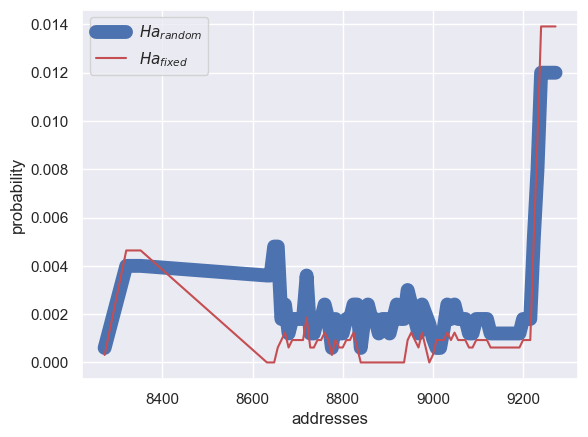

In [8]:
#plot H_a_sec and H_a_nosec to see the difference
maxx=1
for i in range(maxx):
    ranger=int(len(unique_a_tot)/(maxx-i+1)**2)
    sns.set_theme(style="darkgrid")
    plt.figure()
    plt.plot(unique_a_tot[0:ranger], H_a_nosec[0:ranger], 'b', label='$Ha_{random}$',linewidth=10)
    plt.plot(unique_a_tot[0:ranger], H_a_sec[0:ranger], 'r', label='$Ha_{fixed}$')
    #draw line at height 1
    plt.xlabel('addresses')
    plt.ylabel('probability')
    plt.legend()
    plt.show()


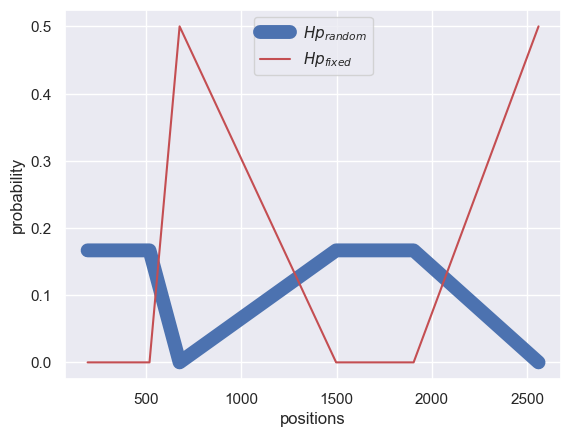

In [9]:
#plot H_a_sec and H_a_nosec to see the difference
maxx=1
for i in range(maxx):
    ranger=int(len(unique_a_tot)/(maxx-i+1)**1)
    sns.set_theme(style="darkgrid")
    plt.figure()
    plt.plot(unique_p_tot[0:ranger], H_p_nosec[0:ranger], 'b',label='$Hp_{random}$',linewidth=10)
    plt.plot(unique_p_tot[0:ranger], H_p_sec[0:ranger], 'r', label='$Hp_{fixed}$')
    plt.xlabel('positions')
    plt.ylabel('probability')
    plt.legend()
    plt.show()